In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib, json
import datetime as dt
import itertools
from dateutil.relativedelta import *
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from pmdarima import auto_arima 
from statsmodels.tsa.stattools import adfuller
import warnings
import pickle
warnings.filterwarnings("ignore")
import joblib


In [137]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [138]:
#test_data = open(r'C:\Users\MERIEM\Desktop\SOUTH AFRICA.xlsx')
test_data=pd.read_excel(r'C:\Users\saghir\Desktop\PFE\Projet finale 07 juillet 2022\saghir\SOUTH AFRICA.xlsx')
#test_data =pd.read_excel(url);
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   arrivals      25 non-null     int64         
 1   employment    25 non-null     float64       
 2   expenditures  25 non-null     int64         
 3   year          25 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 928.0 bytes
None


In [139]:
test_data['year']=pd.to_datetime(test_data['year'], format='%Y-%m-%d')
test_data.head(25)

,arrivals,employment,expenditures,year
0,4684000,350583.0,2654000000,1995-01-01
1,5186000,350583.0,3137000000,1996-01-01
2,5170000,350583.0,3422000000,1997-01-01
3,5898000,350583.0,3419000000,1998-01-01
4,6026000,350583.0,3407000000,1999-01-01
5,6001000,350583.0,3338000000,2000-01-01
6,5908000,350583.0,3256000000,2001-01-01
7,6550000,350583.0,3695000000,2002-01-01
8,6640000,350583.0,6674000000,2003-01-01
9,6815000,350583.0,7571000000,2004-01-01


In [140]:
test_data['year'] = test_data['year'].dt.year.astype('str')+'-'+test_data['year'].dt.month.astype('str')+'-01'
test_data['year'] = pd.to_datetime(test_data['year'])
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   arrivals      25 non-null     int64         
 1   employment    25 non-null     float64       
 2   expenditures  25 non-null     int64         
 3   year          25 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 928.0 bytes
None


In [141]:

test_data.head(25)

,arrivals,employment,expenditures,year
0,4684000,350583.0,2654000000,1995-01-01
1,5186000,350583.0,3137000000,1996-01-01
2,5170000,350583.0,3422000000,1997-01-01
3,5898000,350583.0,3419000000,1998-01-01
4,6026000,350583.0,3407000000,1999-01-01
5,6001000,350583.0,3338000000,2000-01-01
6,5908000,350583.0,3256000000,2001-01-01
7,6550000,350583.0,3695000000,2002-01-01
8,6640000,350583.0,6674000000,2003-01-01
9,6815000,350583.0,7571000000,2004-01-01


In [142]:
predict_test_data = test_data.groupby('year')['arrivals','employment'].sum()
print(predict_test_data)

            arrivals  employment
year                            
1995-01-01   4684000    350583.0
1996-01-01   5186000    350583.0
1997-01-01   5170000    350583.0
1998-01-01   5898000    350583.0
1999-01-01   6026000    350583.0
2000-01-01   6001000    350583.0
2001-01-01   5908000    350583.0
2002-01-01   6550000    350583.0
2003-01-01   6640000    350583.0
2004-01-01   6815000    350583.0
2005-01-01   7518000    507385.0
2006-01-01   8509000    553713.0
2007-01-01   9208000    569677.0
2008-01-01   9729000    607000.0
2009-01-01   9532000    554000.0
2010-01-01  11303000    567300.0
2011-01-01  12097000    622900.0
2012-01-01  13069000    646400.0
2013-01-01  14318000    657700.0
2014-01-01  14530000    681900.0
2015-01-01  13952000    669600.0
2016-01-01  15121000    705800.0
2017-01-01  14975000    681600.0
2018-01-01  15004000    739600.0
2019-01-01  14797000    350583.0


Text(0, 0.5, 'Nomber of Orders')

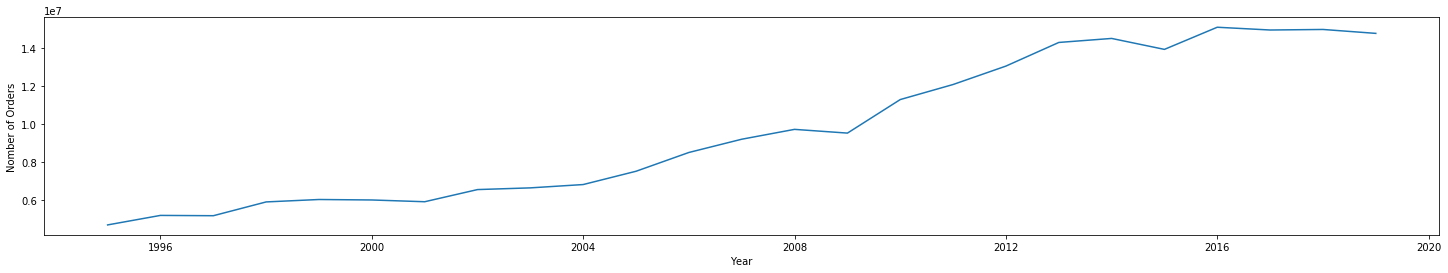

In [143]:
#plot 
fig=plt.figure(0,figsize=(25,4))
ax=plt.gca()
plt.plot(predict_test_data['arrivals'])
ax.set_xlabel('Year')
ax.set_ylabel('Nomber of Orders')


In [144]:
#ax.set_ylabel('Total arrival')
test_model_tourism=auto_arima(predict_test_data['arrivals'],
                           start_p=1, start_q=1, max_p=8, max_q=8,
                           start_P=0, start_Q=0, max_P=8, max_Q=8,
                           m=12, seasonal=True, trace=True, d=1, D=1,
                           error_action='ignore', suppress_warnings=True,
                           random_state = 20, n_fits=30)
print(test_model_tourism.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=367.173, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=367.604, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=366.655, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=366.783, Time=0.04 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=365.085, Time=0.01 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=366.568, Time=0.04 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=368.325, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=367.037, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=365.259, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=368.742, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=366.965, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 0.469 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observ

In [145]:
model_t = model_t = SARIMAX(predict_test_data['arrivals'],
                             order = test_model_tourism.order,
                             initialization='approximate_diffuse',
                             filter_concentrated=True,
                             seasonal_order =test_model_tourism.seasonal_order) 

In [146]:
result_t = model_t.fit() 

In [149]:

result_t.save(r"C:\Users\saghir\Desktop\PFE\Projet finale 07 juillet 2022\saghir\model.h5")
loaded_ARIMA = result_t.load(r"C:\Users\saghir\Desktop\PFE\Projet finale 07 juillet 2022\saghir\model.h5")

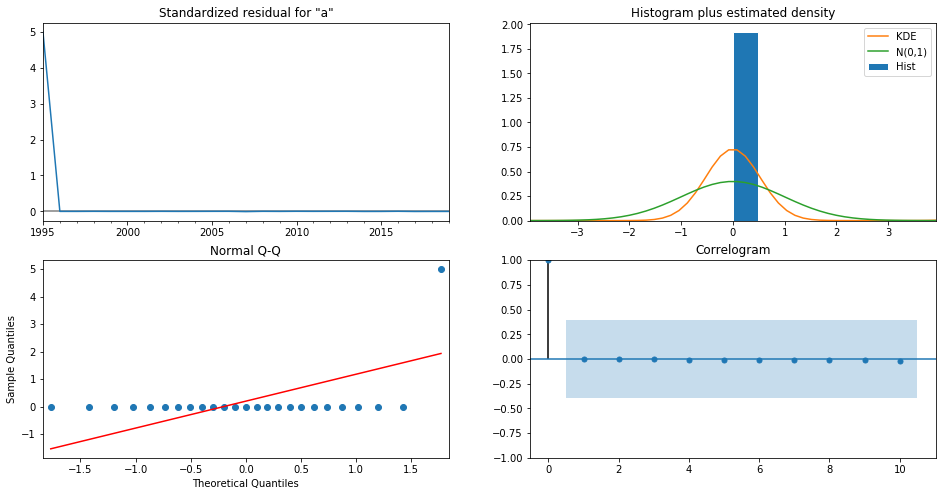

In [150]:
forecast_t=np.round(result_t.predict(start = len(predict_test_data)-12,
                                     end = len(predict_test_data)+11,
                                     typ = 'levels').rename('Forecast Tourism'),0)
forecast_t=np.round(result_t.predict(start = len(predict_test_data)-12,
                                     end = len(predict_test_data)+11,
                                     typ = 'levels').rename('Forecast Tourism'),0)
result_t.plot_diagnostics(figsize=(16,8))
plt.show()

In [151]:
forecast_t=np.round(result_t.predict(start = len(predict_test_data)-12,
                                     end = len(predict_test_data)+11,
                                     typ = 'levels').rename('Forecasting of quantity tourism'),0)

In [152]:
print('je suis forecasttttttttttttttttttttttttttttttt')
print(forecast_t)

je suis forecasttttttttttttttttttttttttttttttt
2008-01-01     8948727.0
2009-01-01     9718968.0
2010-01-01    10203148.0
2011-01-01    11758606.0
2012-01-01    12281191.0
2013-01-01    13289158.0
2014-01-01    15381522.0
2015-01-01    14484937.0
2016-01-01    13917181.0
2017-01-01    16136216.0
2018-01-01    15699329.0
2019-01-01    15400836.0
2020-01-01    15033425.0
2021-01-01    14747040.0
2022-01-01    16489964.0
2023-01-01    17275146.0
2024-01-01    18244376.0
2025-01-01    19492506.0
2026-01-01    19704233.0
2027-01-01    19126147.0
2028-01-01    20295120.0
2029-01-01    20149111.0
2030-01-01    20178109.0
2031-01-01    19971108.0
Freq: AS-JAN, Name: Forecasting of quantity tourism, dtype: float64


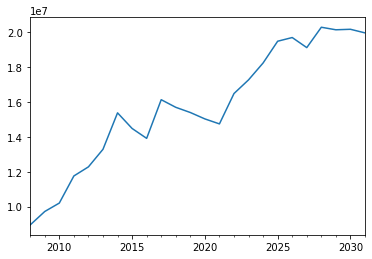

In [153]:
#type(forecast_t['year'])
forecast_t.plot()

In [154]:
#meriem = pd.DataFrame(index=None)
#meriem['arrivals']=forecast_t
#meriem['year']=forecast_t.index


In [156]:
rmse=np.sqrt(mean_squared_error(predict_test_data['arrivals'].tail(12),forecast_t.head(12)))
print(rmse)

831762.2591594808


Text(0, 0.5, 'Nomber of Orders')

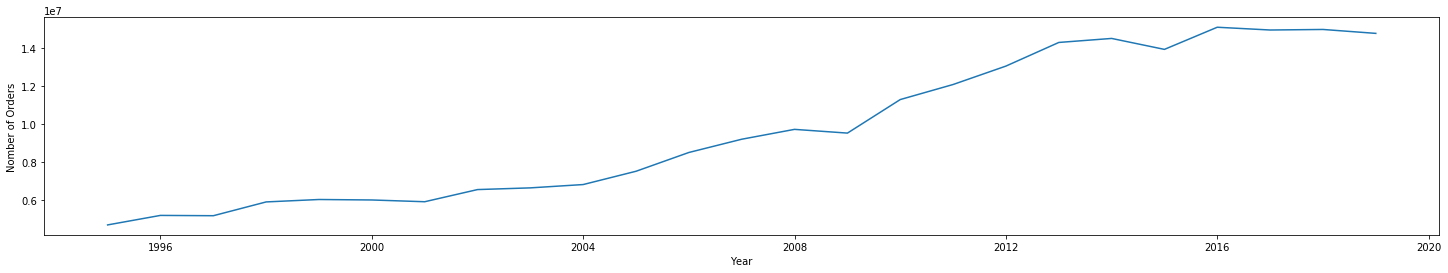

In [157]:
#plot 
fig=plt.figure(0,figsize=(25,4))
ax=plt.gca()
plt.plot(predict_test_data['arrivals'])
ax.set_xlabel('Year')
ax.set_ylabel('Nomber of Orders')

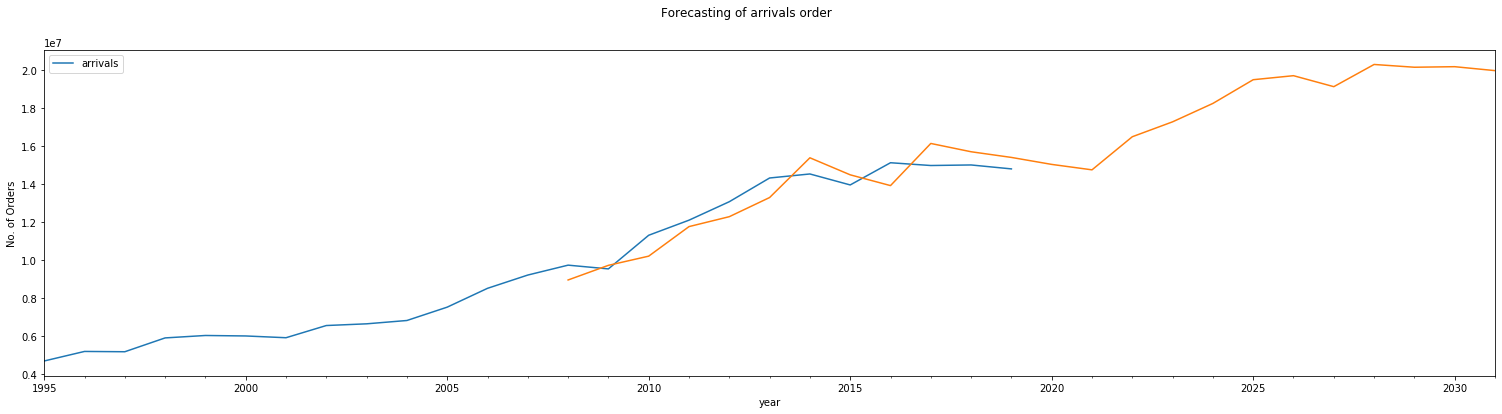

In [158]:
fig, ax = plt.subplots()
fig.suptitle('Forecasting of arrivals order')
predict_test_data['arrivals'].plot(figsize=(26, 6),ax=ax, legend=True) 
plt.xlabel('year')
plt.ylabel('No. of Orders')
forecast_t.plot()


In [159]:
forecast_t.to_excel(r'Forecast.xlsx',index=True)